In [67]:
%load_ext autoreload
%autoreload 2
import numpy as np
from forest_fire import ForestFire
from pandas import DataFrame

from projects.agent_based_modelling.lib import batch_run
from projects.agent_based_modelling.lib.plot import animate_show


def plot_opposite_edge_hit(_df: DataFrame):
    _df.groupby(["p", "size"]).mean().reset_index().set_index("p").groupby("size")["opposite_edge_hit"].plot(
        legend=True,
        marker=".",
        linestyle="None",
        title="probability of hitting the opposite edge",
    )


def plot_biggest_cluster(_df: DataFrame):
    df = _df.groupby(["p", "size"]).mean().reset_index().set_index("p")
    df["biggest_burned_cluster"] = df["biggest_burned_cluster"] / df["size"] ** 2
    df.groupby("size")["biggest_burned_cluster"].plot(
        legend=True,
        marker=".",
        linestyle="None",
        title="percentage area of biggest burned cluster",
    )


def get_percolation_threshold(_df: DataFrame) -> dict[int, float]:
    result = {}
    for size in _df["size"].drop_duplicates():
        df = _df[_df["size"] == size].groupby("p").mean()["opposite_edge_hit"]
        result[size] = df[df > 0.5].idxmin()
    return result

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


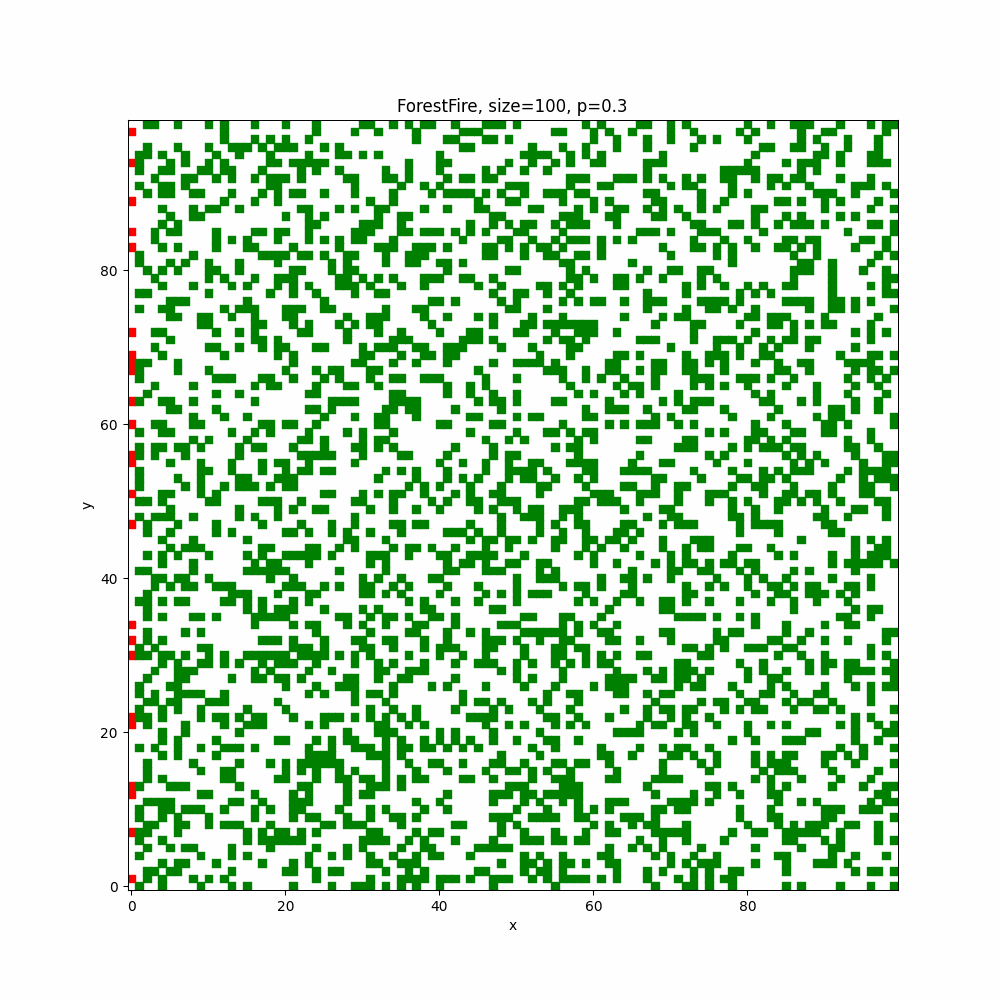

In [6]:
animate_show(
    model=ForestFire(size=100, p=0.3),
    filename="forest_fire_100_0.3.gif",
    agent_color_func=lambda tree: tree.state,
    title="ForestFire, size=100, p=0.3",
)

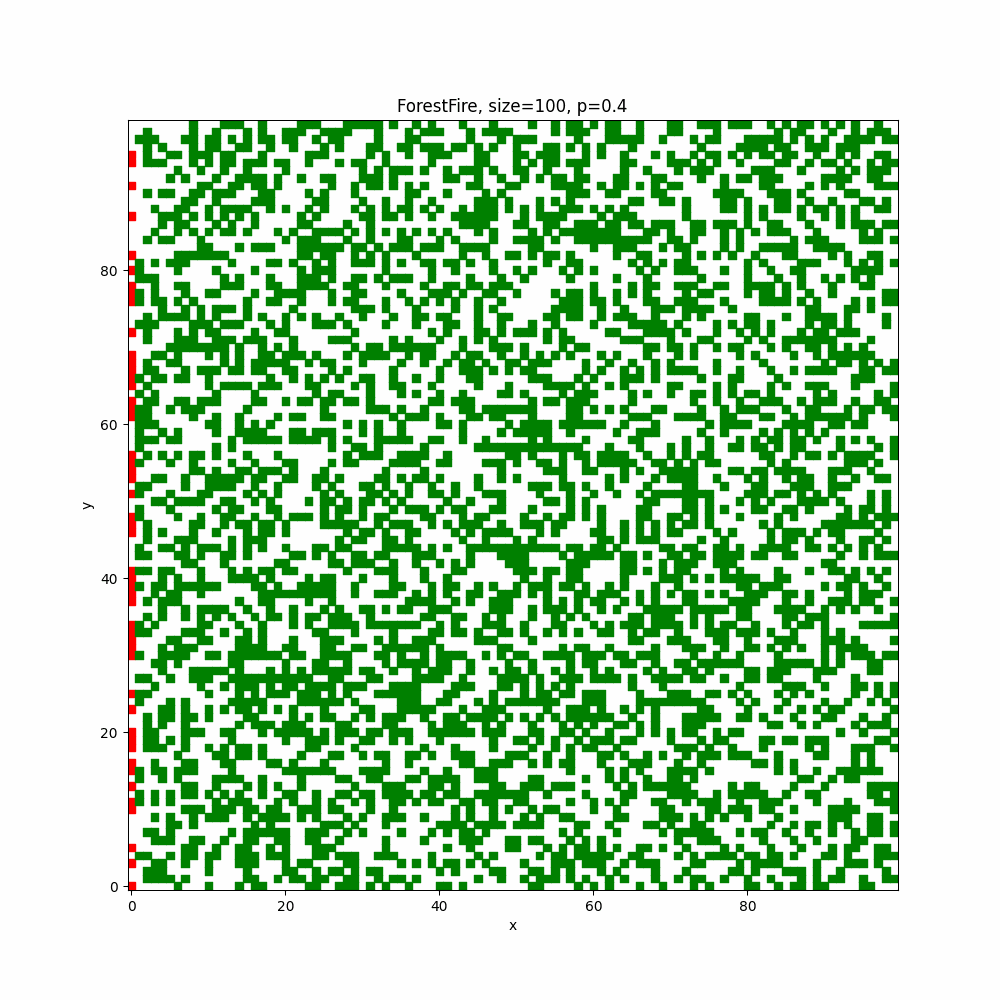

In [7]:
animate_show(
    model=ForestFire(size=100, p=0.4),
    filename="forest_fire_100_0.4.gif",
    agent_color_func=lambda tree: tree.state,
    title="ForestFire, size=100, p=0.4",
)

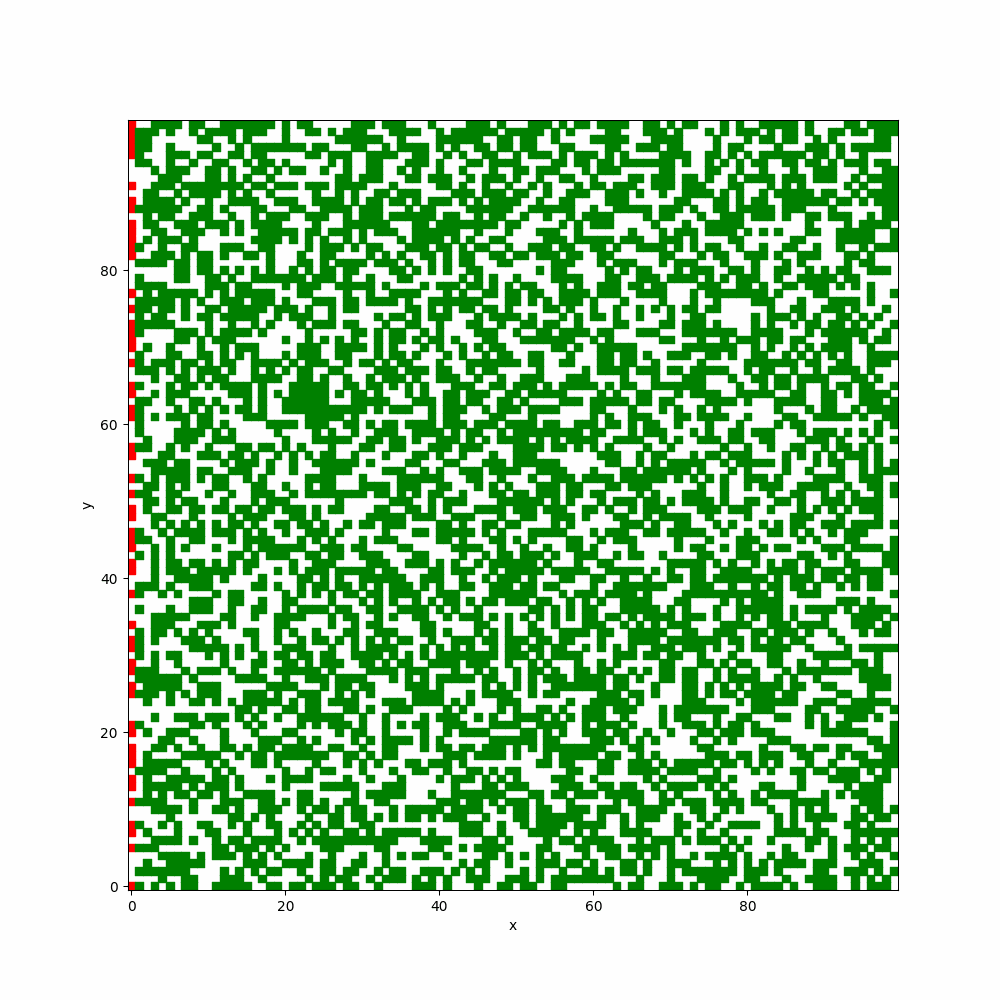

In [18]:
animate_show(
    model=ForestFire(size=100, p=0.5),
    filename="forest_fire_100_0.5.gif",
    agent_color_func=lambda tree: tree.state,
)

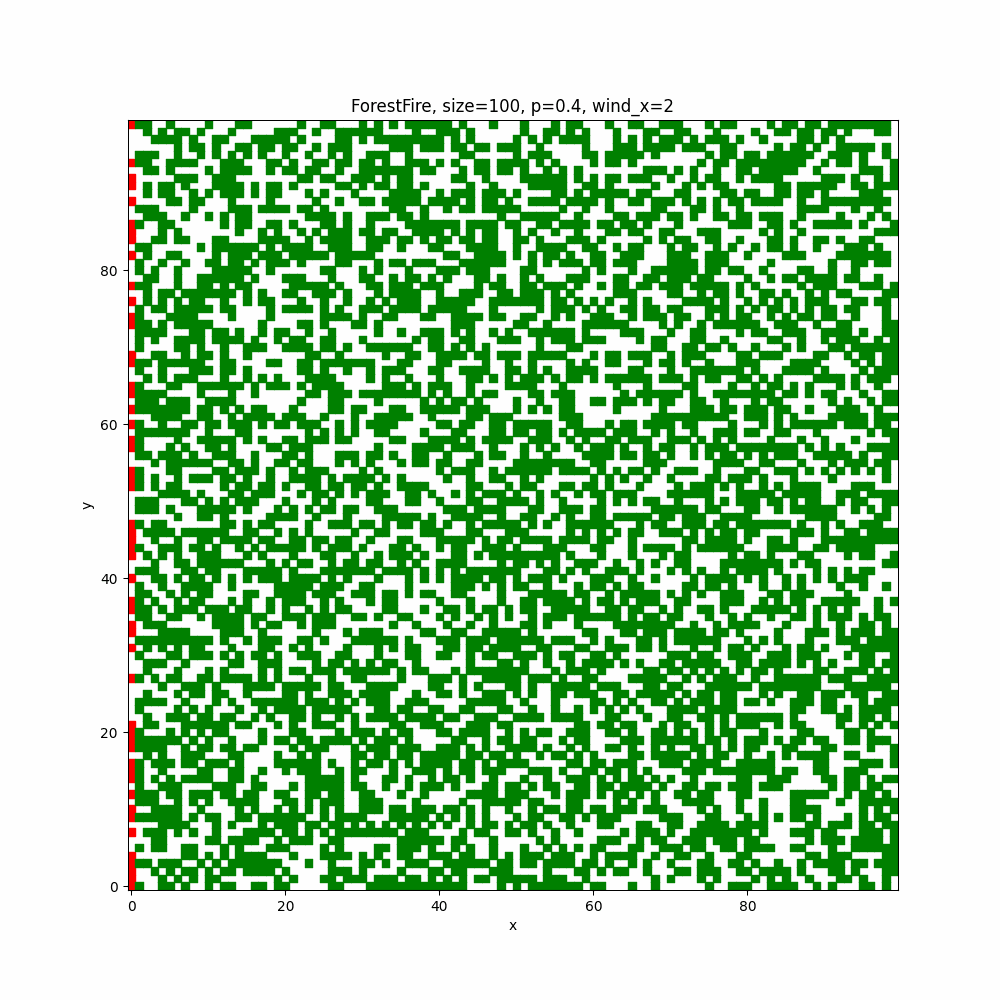

In [8]:
animate_show(
    model=ForestFire(size=100, p=0.5, wind_x=2),
    filename="forest_fire_100_0.5_wind_x_2.gif",
    agent_color_func=lambda tree: tree.state,
    title="ForestFire, size=100, p=0.4, wind_x=2",
)

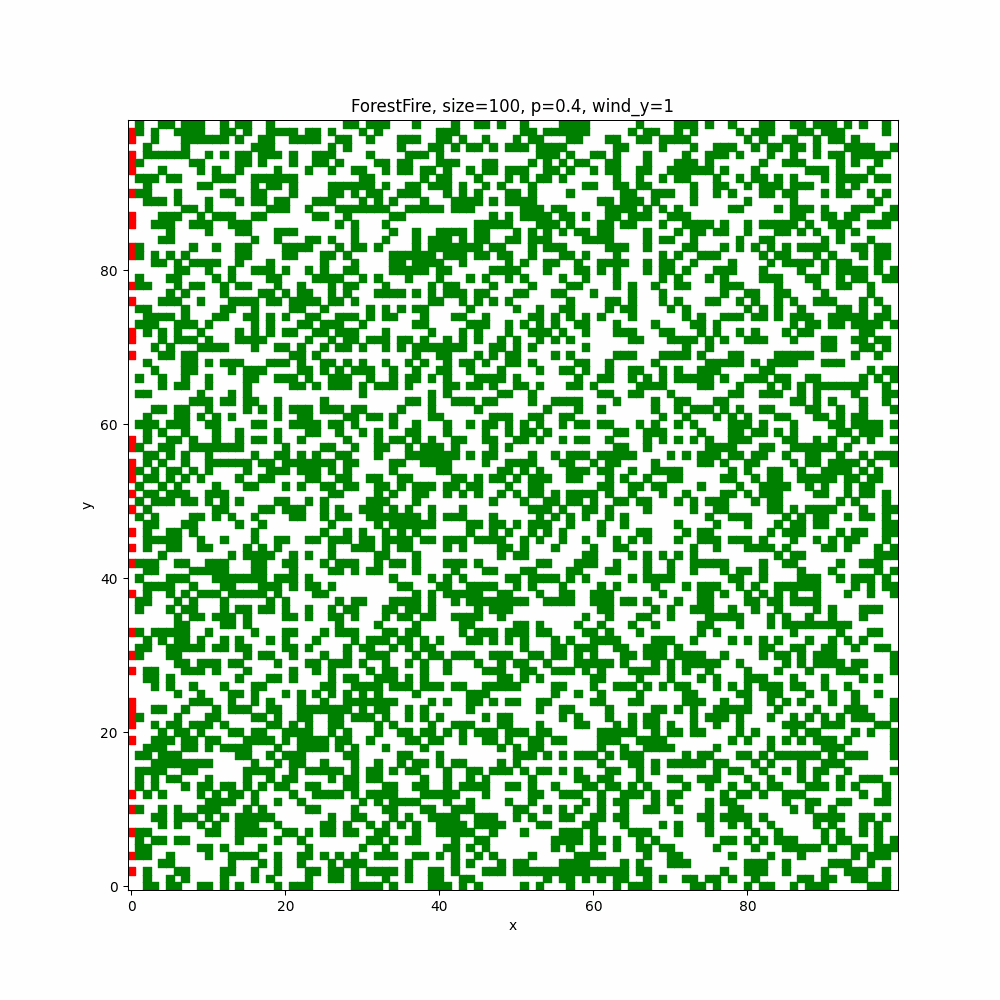

In [9]:
animate_show(
    model=ForestFire(size=100, p=0.4, wind_y=1),
    filename="forest_fire_100_0.4_wind_y_1.gif",
    agent_color_func=lambda tree: tree.state,
    title="ForestFire, size=100, p=0.4, wind_y=1",
)

In [12]:
df = batch_run(
    cls=ForestFire,
    params=dict(
        size=[20, 50, 100],
        p=np.arange(start=0, stop=1, step=0.01),
    ),
    iterations=100,
)

100%|██████████| 30000/30000 [10:08<00:00, 49.31it/s] 


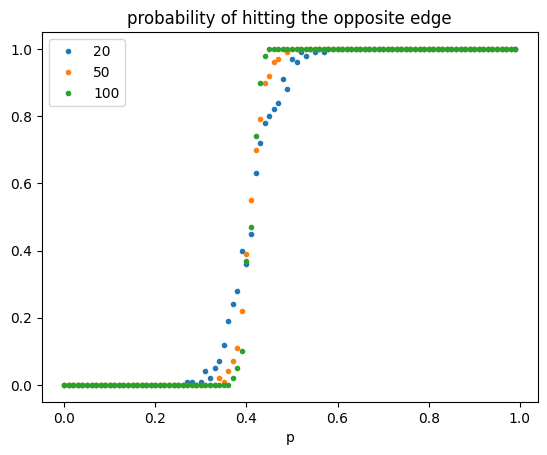

In [69]:
plot_opposite_edge_hit(df)

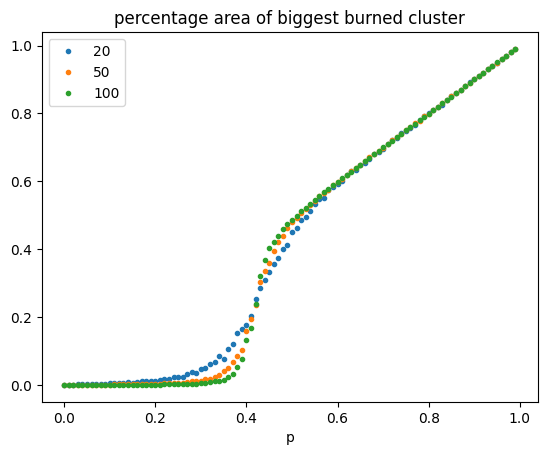

In [47]:
plot_biggest_cluster(df)

In [68]:
get_percolation_threshold(df)

{20: 0.42, 50: 0.41000000000000003, 100: 0.42}

In [9]:
df = batch_run(
    cls=ForestFire,
    params=dict(
        size=[20, 50, 100],
        p=np.arange(start=0, stop=1, step=0.01),
        wind_x=1,
    ),
    iterations=200,
)

100%|██████████| 60000/60000 [16:56<00:00, 59.05it/s]  


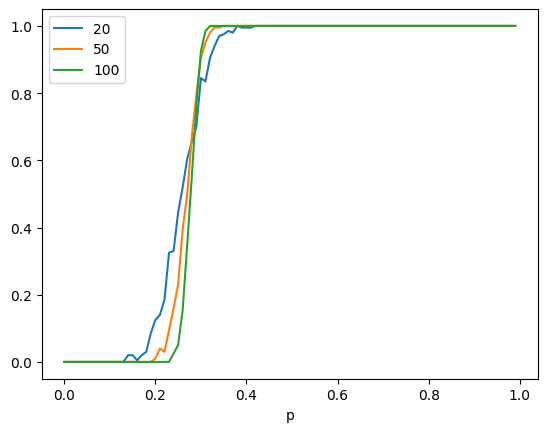

In [10]:
plot_opposite_edge_hit(df)

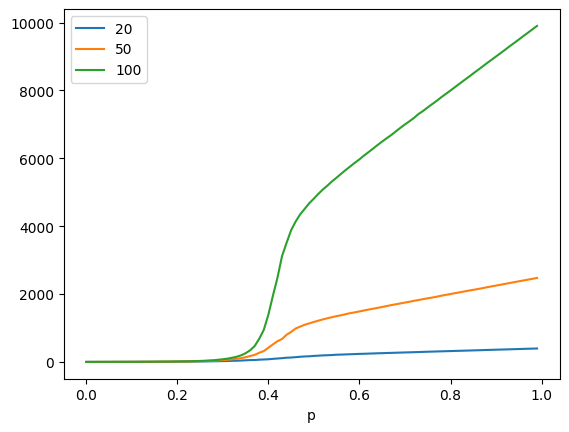

In [11]:
plot_biggest_cluster(df)

In [12]:
df = batch_run(
    cls=ForestFire,
    params=dict(
        size=[20, 50, 100],
        p=np.arange(start=0, stop=1, step=0.01),
        wind_x=2,
    ),
    iterations=200,
)

100%|██████████| 60000/60000 [16:57<00:00, 58.98it/s]  


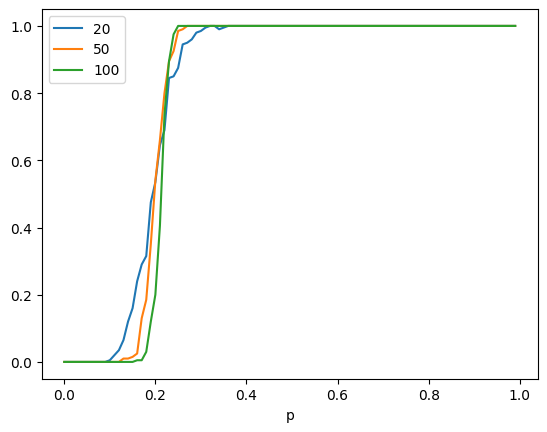

In [13]:
plot_opposite_edge_hit(df)

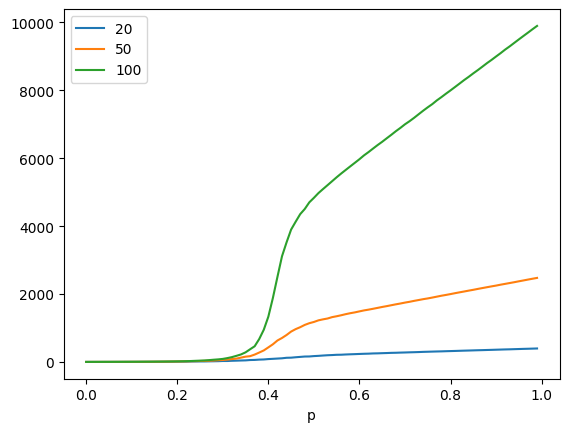

In [14]:
plot_biggest_cluster(df)